# Advantage vs. Luck

With regards to probability, the Hafling Luck trait ([Halfing Traits](https://www.dndbeyond.com/races/14-halfling#HalflingTraits)) is not as good as rolling with advantage ([Advantage and Disadvantage](https://www.dndbeyond.com/sources/basic-rules/using-ability-scores#AdvantageandDisadvantage)), but is better than a normal roll:

In [4]:
# Standard library
import random

# Third-party
import matplotlib.pyplot as plot
import matplotlib.ticker as ticker
import numpy

%matplotlib inline
plot.style.use("ggplot")
ROLLS = 100000


def roll_d20(mod=0):
    return random.randint(1, 20) + mod


def roll_adv(mod, dc):
    roll1 = roll_d20(mod)
    roll2 = roll_d20(mod)
    roll = sorted([roll1, roll2])[-1]
    if roll >= dc:
        result = True
    else:
        result = False
    return result


def roll_luck(mod, dc):
    roll = roll_d20(mod)
    if roll == 1:
        roll = roll_d20(mod)
    if roll >= dc:
        result = True
    else:
        result = False
    return result


def roll_norm(mod, dc):
    roll = roll_d20(mod)
    if roll >= dc:
        result = True
    else:
        result = False
    return result


def aggregate(results):
    data = {}
    for result in results:
        if result:
            key = "success"
        else:
            key = "failure"
        try:
            data[key] += 1
        except KeyError:
            data[key] = 1
    for key, count in data.items():
        data[key] = round((count / ROLLS) * 100, 2)
    success_percent = data["success"]
    return success_percent


def simulate_adv(mod, dc):
    results = []
    for _ in range(ROLLS):
        results.append(roll_adv(mod, dc))
    data = aggregate(results)
    return data


def simulate_luck(mod, dc):
    results = []
    for _ in range(ROLLS):
        results.append(roll_luck(mod, dc))
    data = aggregate(results)
    return data


def simulate_norm(mod, dc):
    results = []
    for _ in range(ROLLS):
        results.append(roll_norm(mod, dc))
    data = aggregate(results)
    return data

In [5]:
advantage_roll = {}
for dc in range(1, 21):
    advantage_roll[dc] = simulate_adv(0, dc)
advantage_roll = numpy.array(list(advantage_roll.items())).transpose()

luck_roll = {}
for dc in range(1, 21):
    luck_roll[dc] = simulate_luck(0, dc)
luck_roll = numpy.array(list(luck_roll.items())).transpose()

norm_roll = {}
for dc in range(1, 21):
    norm_roll[dc] = simulate_norm(0, dc)
norm_roll = numpy.array(list(norm_roll.items())).transpose()

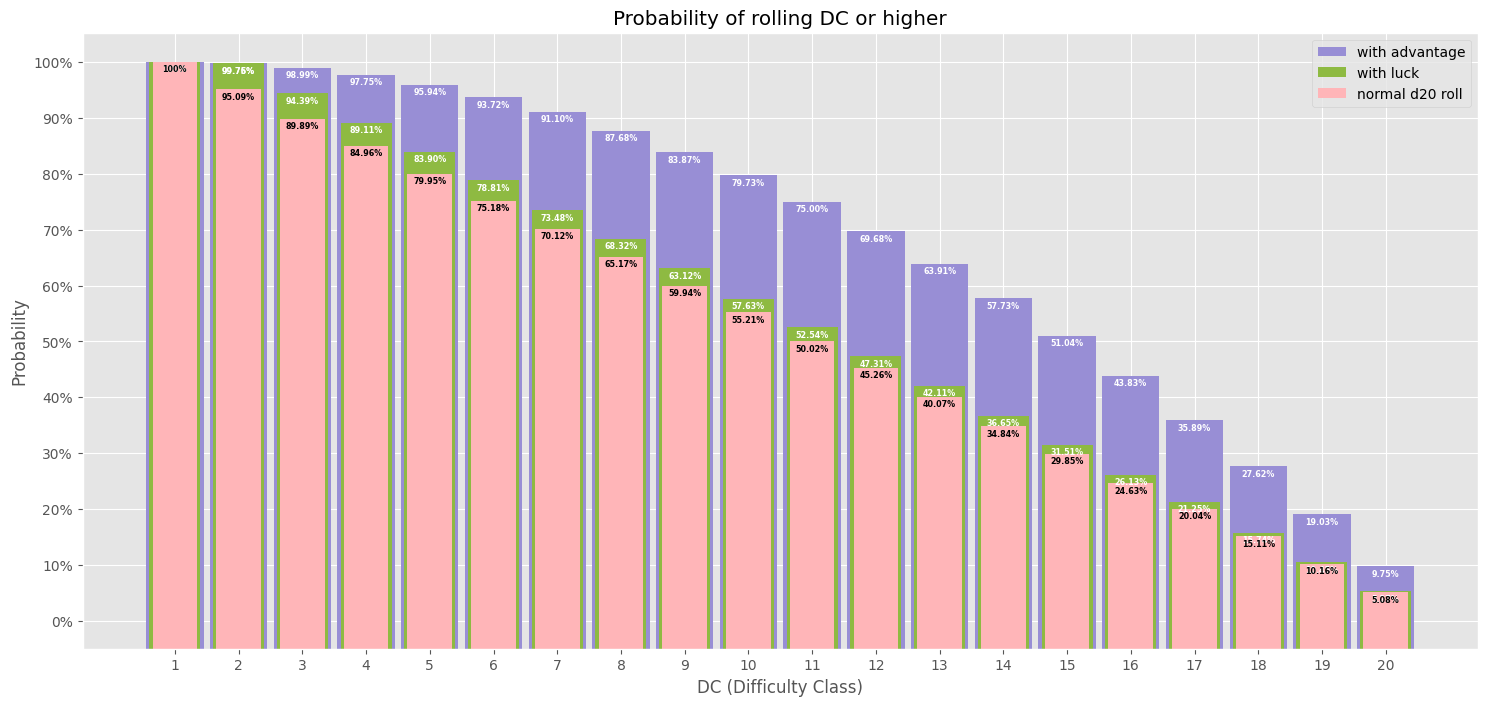

In [15]:
def annotate(ax, index, probability, color="white"):
    """
    Annotate top of bar plot with exact probability percentage
    """
    if probability >= 100.0:
        text = f"{probability:0.0f}%"
    else:
        text = f"{probability:0.2f}%"
    ax.annotate(
        text,
        (index, probability - 0.5),
        color=color,
        fontsize="xx-small",
        fontweight="bold",
        horizontalalignment="center",
        verticalalignment="top",
        zorder=5,
    )


# Initialize plot
fig, ax = plot.subplots()
fig.set_size_inches(18, 8)

# Create bar plot for success probability with advantage
ax.bar(
    advantage_roll[0],
    advantage_roll[1] + 5,
    bottom=-5,
    width=0.9,
    color="C2",
    label="with advantage",
)
for i, probability in enumerate(advantage_roll[1]):
    annotate(ax, i + 1, probability)
# Create bar plot for success probability with luck
ax.bar(
    luck_roll[0],
    luck_roll[1] + 5,
    bottom=-5,
    width=0.8,
    color="C5",
    label="with luck",
)
for i, probability in enumerate(luck_roll[1]):
    annotate(ax, i + 1, probability)
# Create bar plot for success probability of a normal d20 roll
ax.bar(
    norm_roll[0],
    norm_roll[1] + 5,
    bottom=-5,
    width=0.7,
    color="C6",
    label="normal d20 roll",
)
for i, probability in enumerate(norm_roll[1]):
    annotate(ax, i + 1, probability, "black")

# Configure Title
ax.set_title("Probability of rolling DC or higher")
# Confgure X Axis
ax.set_xlabel("DC (Difficulty Class)")
ax.xaxis.set_major_locator(ticker.FixedLocator(advantage_roll[0]))
# Configure Y Axis
ax.set_ylabel("Probability")
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
# Configure Legend
ax.legend()